In [ ]:
! pip install -U langchain langchain_openai langchain_core langgraph

### Agent with HITL

In [1]:
from langchain.tools import tool
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.prebuilt.interrupt import HumanInterruptConfig, InterruptToolNode

from langchain.chat_models import init_chat_model
llm = init_chat_model("openai:gpt-4.1", temperature=0)

@tool
def write_email(to: str, subject: str, content: str) -> str:
    """Write and send an email."""
    # Placeholder response - in real app would send email
    return f"Email sent to {to} with subject '{subject}' and content: {content}"

agent = create_react_agent(
    llm,
    tools=[write_email],
    prompt="You are a helpful email assistant.",
    post_model_hook=InterruptToolNode(
        write_email=HumanInterruptConfig(
              allow_accept=True,
              allow_edit=True,
              allow_ignore=True,
              allow_respond=True,
          )
    ),
    checkpointer=InMemorySaver(),
)

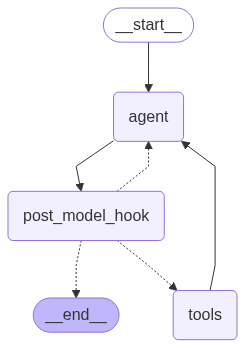

In [2]:
from IPython.display import Image
Image(agent.get_graph(xray=True).draw_mermaid_png())

### Accepting the tool call

In [13]:
msg = [{"role": "user", "content": "Draft an email response to my boss (boss@company.ai) about tomorrow's meeting on the Interrupt Conference"}]

import uuid
thread_id_2 = uuid.uuid4()
thread_config_2 = {"configurable": {"thread_id": thread_id_2}}

# Run the graph until a tool call that we choose to interrupt
print("Running the graph until the first interrupt...")
for chunk in agent.stream({"messages": msg}, config=thread_config_2):
    if '__interrupt__' in chunk:
        Interrupt_Object = chunk['__interrupt__'][0]
        print("\nINTERRUPT OBJECT:")
        print(f"Action Request: {Interrupt_Object.value[0]['action_request']}")
    else:
        print(chunk)

Running the graph until the first interrupt...
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5kiEF7KNC5d2uzF5vWxJZJJM', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow\'s Meeting","content":"Dear [Boss\'s Name],\\n\\nThank you for the reminder about tomorrow\'s meeting. I confirm my attendance and look forward to discussing the agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the meeting.\\n\\nBest regards,\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 75, 'total_tokens': 166, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_2d9626f3

In [14]:
from langgraph.types import Command

print(f"\nSimulating user accepting the {Interrupt_Object.value[0]['action_request']} tool call...")
for chunk in agent.stream(Command(resume=[{"type": "accept"}]), config=thread_config_2):
    print(chunk)


Simulating user accepting the {'action': 'write_email', 'args': {'to': 'boss@company.ai', 'subject': "Re: Tomorrow's Meeting", 'content': "Dear [Boss's Name],\n\nThank you for the reminder about tomorrow's meeting. I confirm my attendance and look forward to discussing the agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the meeting.\n\nBest regards,\n[Your Name]"}} tool call...
{'post_model_hook': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5kiEF7KNC5d2uzF5vWxJZJJM', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow\'s Meeting","content":"Dear [Boss\'s Name],\\n\\nThank you for the reminder about tomorrow\'s meeting. I confirm my attendance and look forward to discussing the agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the meeting.\\n\\nBest regards,\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function

In [15]:
state = agent.get_state(thread_config_2)
for m in state.values['messages']:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) about tomorrow's meeting.
================================== Ai Message ==================================
Tool Calls:
  write_email (call_5kiEF7KNC5d2uzF5vWxJZJJM)
 Call ID: call_5kiEF7KNC5d2uzF5vWxJZJJM
  Args:
    to: boss@company.ai
    subject: Re: Tomorrow's Meeting
    content: Dear [Boss's Name],

Thank you for the reminder about tomorrow's meeting. I confirm my attendance and look forward to discussing the agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the meeting.

Best regards,
[Your Name]
================================= Tool Message =================================
Name: write_email

Email sent to boss@company.ai with subject 'Re: Tomorrow's Meeting' and content: Dear [Boss's Name],

Thank you for the reminder about tomorrow's meeting. I confirm my attendance and look forward to discussing

### Responding to the tool call

In [17]:
# Create a new thread for testing the respond action
thread_id_3 = uuid.uuid4()
thread_config_3 = {"configurable": {"thread_id": thread_id_3}}

# Run the graph until a tool call that we choose to interrupt
msg = [{"role": "user", "content": "Draft an email response to my boss (boss@company.ai) about tomorrow's meeting on the Interrupt Conference."}]
print("Running the graph until the first interrupt...")
for chunk in agent.stream({"messages": msg}, config=thread_config_3):
    if '__interrupt__' in chunk:
        Interrupt_Object = chunk['__interrupt__'][0]
        print("\nINTERRUPT OBJECT:")
        print(f"Action Request: {Interrupt_Object.value[0]['action_request']}")
    else:
        print(chunk)

Running the graph until the first interrupt...
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_IByJungo4tOleyF4lDEcBu7R', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow’s Meeting on the Interrupt Conference","content":"Dear [Boss\'s Name],\\n\\nThank you for the reminder about tomorrow’s meeting regarding the Interrupt Conference. I have reviewed the agenda and am prepared to discuss the key points. Please let me know if there are any specific topics or materials you would like me to focus on or bring to the meeting.\\n\\nLooking forward to our discussion.\\n\\nBest regards,\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 80, 'total_tokens': 192, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_detail

In [18]:
# Now simulate user responding to the tool call with feedback
print("\nSimulating user responding to the tool call with feedback...")
for chunk in agent.stream(Command(resume={"type": "response", "args": "Shorter and less formal."}), config=thread_config_3):
    print(chunk)


Simulating user responding to the tool call with feedback...
{'post_model_hook': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_IByJungo4tOleyF4lDEcBu7R', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow’s Meeting on the Interrupt Conference","content":"Dear [Boss\'s Name],\\n\\nThank you for the reminder about tomorrow’s meeting regarding the Interrupt Conference. I have reviewed the agenda and am prepared to discuss the key points. Please let me know if there are any specific topics or materials you would like me to focus on or bring to the meeting.\\n\\nLooking forward to our discussion.\\n\\nBest regards,\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 80, 'total_tokens': 192, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 

In [19]:
print(f"\nSimulating user accepting the {Interrupt_Object.value[0]['action_request']} tool call...")
for chunk in agent.stream(Command(resume=[{"type": "accept"}]), config=thread_config_3):
    print(chunk)


Simulating user accepting the {'action': 'write_email', 'args': {'to': 'boss@company.ai', 'subject': 'Re: Tomorrow’s Meeting on the Interrupt Conference', 'content': "Dear [Boss's Name],\n\nThank you for the reminder about tomorrow’s meeting regarding the Interrupt Conference. I have reviewed the agenda and am prepared to discuss the key points. Please let me know if there are any specific topics or materials you would like me to focus on or bring to the meeting.\n\nLooking forward to our discussion.\n\nBest regards,\n[Your Name]"}} tool call...
{'post_model_hook': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1MensMD3ArJUJqgBXv1AQAvQ', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow’s Meeting on the Interrupt Conference","content":"Thanks for the heads up about tomorrow’s meeting on the Interrupt Conference. I’ll be ready! Let me know if there’s anything specific you want me to cover.\\n\\nThanks,\\n[Your Name]"}', 'name

In [20]:
# Let's check the state after responding
state = agent.get_state(thread_config_3)
for m in state.values['messages']:
    m.pretty_print()

================================ Human Message =================================

Draft an email response to my boss (boss@company.ai) about tomorrow's meeting on the Interrupt Conference.
================================== Ai Message ==================================
Tool Calls:
  write_email (call_IByJungo4tOleyF4lDEcBu7R)
 Call ID: call_IByJungo4tOleyF4lDEcBu7R
  Args:
    to: boss@company.ai
    subject: Re: Tomorrow’s Meeting on the Interrupt Conference
    content: Dear [Boss's Name],

Thank you for the reminder about tomorrow’s meeting regarding the Interrupt Conference. I have reviewed the agenda and am prepared to discuss the key points. Please let me know if there are any specific topics or materials you would like me to focus on or bring to the meeting.

Looking forward to our discussion.

Best regards,
[Your Name]
================================= Tool Message =================================
Name: write_email

Shorter and less formal.
================================== A

### Editing the tool call

In [24]:
# Create a new thread for testing the edit action
thread_id_4 = uuid.uuid4()
thread_config_4 = {"configurable": {"thread_id": thread_id_4}}

# Run the graph until a tool call that we choose to interrupt
msg = [{"role": "user", "content": "Draft a response to my boss (boss@company.ai) about tomorrow's meeting on the Interrupt Conference. Call the tool write_email."}]
print("Running the graph until the first interrupt...")
for chunk in agent.stream({"messages": msg}, config=thread_config_4):
    if '__interrupt__' in chunk:
        Interrupt_Object = chunk['__interrupt__'][0]
        print("\nINTERRUPT OBJECT:")
        print(f"Action Request: {Interrupt_Object.value[0]['action_request']}")
    else:
        print(chunk)

Running the graph until the first interrupt...
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_nm339QV5eqaBLC1WU5xFmiQM', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow\'s Meeting on the Interrupt Conference","content":"Hi,\\n\\nThank you for scheduling the meeting regarding the Interrupt Conference. I look forward to discussing the agenda and any preparations needed for the event. Please let me know if there are specific topics or materials I should review beforehand.\\n\\nBest regards,\\n\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 85, 'total_tokens': 174, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'syst

In [25]:
# Now simulate user editing the write_email tool call
print("\nSimulating user editing the write_email tool call...")
edited_email_args = {
    "action": "write_email",
    "args": {
        "to": "boss@company.ai",
        "subject": "Meeting tomorrow",
        "content": "Hi boss,\n\nI'll be at the Interrupt Conference meeting tomorrow and will bring my notes. Looking forward to discussing our plans!\n\nThanks,\nMe"
    }
}

for chunk in agent.stream(Command(resume={"type": "edit", "args": edited_email_args}), config=thread_config_4):
    print(chunk)


Simulating user editing the write_email tool call...
{'post_model_hook': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_nm339QV5eqaBLC1WU5xFmiQM', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow\'s Meeting on the Interrupt Conference","content":"Hi,\\n\\nThank you for scheduling the meeting regarding the Interrupt Conference. I look forward to discussing the agenda and any preparations needed for the event. Please let me know if there are specific topics or materials I should review beforehand.\\n\\nBest regards,\\n\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 85, 'total_tokens': 174, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2

In [26]:
# Let's check the state after editing
state = agent.get_state(thread_config_4)
for m in state.values['messages']:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) about tomorrow's meeting on the Interrupt Conference. Call the tool write_email.
================================== Ai Message ==================================
Tool Calls:
  write_email (call_nm339QV5eqaBLC1WU5xFmiQM)
 Call ID: call_nm339QV5eqaBLC1WU5xFmiQM
  Args:
    to: boss@company.ai
    subject: Meeting tomorrow
    content: Hi boss,

I'll be at the Interrupt Conference meeting tomorrow and will bring my notes. Looking forward to discussing our plans!

Thanks,
Me
================================= Tool Message =================================
Name: write_email

Email sent to boss@company.ai with subject 'Meeting tomorrow' and content: Hi boss,

I'll be at the Interrupt Conference meeting tomorrow and will bring my notes. Looking forward to discussing our plans!

Thanks,
Me
================================== Ai Message ==================================

### Ignoring the tool call



In [28]:
# Create a new thread for testing the ignore action
thread_id_5 = uuid.uuid4()
thread_config_5 = {"configurable": {"thread_id": thread_id_5}}

# Run the graph until a tool call that we choose to interrupt
msg = [{"role": "user", "content": "Draft a response to my boss (boss@company.ai) about tomorrow's meeting on the Interrupt Conference. Call the tool write_email."}]
print("Running the graph until the first interrupt...")
for chunk in agent.stream({"messages": msg}, config=thread_config_5):
    if '__interrupt__' in chunk:
        Interrupt_Object = chunk['__interrupt__'][0]
        print("\nINTERRUPT OBJECT:")
        print(f"Action Request: {Interrupt_Object.value[0]['action_request']}")
    else:
        print(chunk)

Running the graph until the first interrupt...
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kqtyP1N3Hxe0Eovxfuh7xWIl', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow\'s Meeting on the Interrupt Conference","content":"Hi,\\n\\nThank you for scheduling the meeting regarding the Interrupt Conference. I look forward to discussing the agenda and any preparations needed for the event. Please let me know if there are specific topics or materials you’d like me to review beforehand.\\n\\nBest regards,\\n\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 85, 'total_tokens': 177, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14

In [29]:
# Now simulate user ignoring the tool call
print("\nSimulating user ignoring the tool call...")
for chunk in agent.stream(Command(resume={"type": "ignore"}), config=thread_config_5):
    print(chunk)


Simulating user ignoring the tool call...
{'post_model_hook': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kqtyP1N3Hxe0Eovxfuh7xWIl', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow\'s Meeting on the Interrupt Conference","content":"Hi,\\n\\nThank you for scheduling the meeting regarding the Interrupt Conference. I look forward to discussing the agenda and any preparations needed for the event. Please let me know if there are specific topics or materials you’d like me to review beforehand.\\n\\nBest regards,\\n\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 85, 'total_tokens': 177, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025

In [30]:
# Let's check the state after ignoring
state = agent.get_state(thread_config_5)
print("\nFinal state after ignore action:")
for m in state.values['messages']:
    m.pretty_print()


Final state after ignore action:
================================ Human Message =================================

Draft a response to my boss (boss@company.ai) about tomorrow's meeting on the Interrupt Conference. Call the tool write_email.
================================== Ai Message ==================================
Tool Calls:
  write_email (call_kqtyP1N3Hxe0Eovxfuh7xWIl)
 Call ID: call_kqtyP1N3Hxe0Eovxfuh7xWIl
  Args:
    to: boss@company.ai
    subject: Re: Tomorrow's Meeting on the Interrupt Conference
    content: Hi,

Thank you for scheduling the meeting regarding the Interrupt Conference. I look forward to discussing the agenda and any preparations needed for the event. Please let me know if there are specific topics or materials you’d like me to review beforehand.

Best regards,

[Your Name]
================================= Tool Message =================================
Name: write_email

User ignored the tool call for `write_email` with id call_kqtyP1N3Hxe0Eovxfuh7xWIl
